# Dashboard (Updated - PDF)

<div class="alert alert-block alert-info">
<b>Dashboard:</b> For visualization purposes
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## O/U Goals

In [2]:
# import dataframes of each Excel sheet
la_liga = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='La Liga')
epl = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='EPL')
serie_a = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='Serie A')
bundesliga = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='Bundesliga')
ligue_1 = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='Ligue 1')
eredivisie = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='Eredivisie')

# Russia?
#rfpl = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='RFPL')

# add a column for the league of each df
la_liga['League'] = 'La Liga'
epl['League'] = 'Premier'
serie_a['League'] = 'Serie A'
bundesliga['League'] = 'Bundesliga'
ligue_1['League'] = 'Ligue 1'
eredivisie['League'] = 'Eredivisie'
#rfpl['League'] = 'RFPL'


# concatenate the datasets into one
df = pd.concat([epl, la_liga, serie_a, bundesliga, ligue_1, eredivisie]).reset_index(drop=True) # , rfpl 

# create a new column with the full game
df['home_team'] = df['home_team'] + ' vs ' + df['away_team']
df = df.drop('away_team', axis =1)

#rename columns
df = df.rename(columns= {'home_team':'Game'}) #, 'prob_over_2_goals': '+2.5 Goals (%)', 'expected_goals':'Expected Goals'})

# change the order of the columns
df = df[['Game', 'League','+1.5(%)', '+2.5(%)', '+3.5(%)', 'xG']]

#rounding values        
df['+1.5(%)'] = round(df['+1.5(%)'],2)
df['+2.5(%)'] = round(df['+2.5(%)'],2)
df['+3.5(%)'] = round(df['+3.5(%)'],2)
df['xG'] = round(df['xG'],2)

df_full = df.copy() # COPY FOR FULL REPORT PDF

# drop the records in which the probability is less than 67%
df = df[df['+2.5(%)'] >= 0.67].reset_index(drop=True)



# add a value in a new variable using a loop (if it's < 83 = 'O1.5', > 'O2.5')
for index, row in df.iterrows():
    if row['+2.5(%)'] >= 0.84:
        df.loc[index, 'Decision'] = 'O2.5'
    else:
        df.loc[index,'Decision'] = 'O1.5'
'''        
#rounding values        
df['+1.5(%)'] = round(df['+1.5(%)'],2)
df['+2.5(%)'] = round(df['+2.5(%)'],2)
df['+3.5(%)'] = round(df['+3.5(%)'],2)
df['xG'] = round(df['xG'],2)
'''

df


,Game,League,+1.5(%),+2.5(%),+3.5(%),xG,Decision
0,Aston Villa vs Brighton,Premier,0.94,0.76,0.52,5.25,O1.5
1,West Ham vs Sheffield United,Premier,0.96,0.84,0.63,6.00,O2.5
2,Wolverhampton Wanderers vs Manchester City,Premier,1.00,1.00,0.98,10.00,O2.5
3,Barcelona vs Sevilla,La Liga,0.99,0.97,0.90,7.67,O2.5
4,Rayo Vallecano vs Mallorca,La Liga,0.98,0.91,0.75,6.92,O2.5
5,Girona vs Real Madrid,La Liga,0.90,0.69,0.42,4.75,O1.5
6,Almeria vs Granada,La Liga,0.98,0.90,0.72,7.08,O2.5
7,Alaves vs Osasuna,La Liga,0.95,0.78,0.53,5.56,O1.5
8,Atletico Madrid vs Cadiz,La Liga,0.98,0.94,0.85,6.33,O2.5
9,AC Milan vs Lazio,Serie A,0.97,0.88,0.74,5.67,O2.5


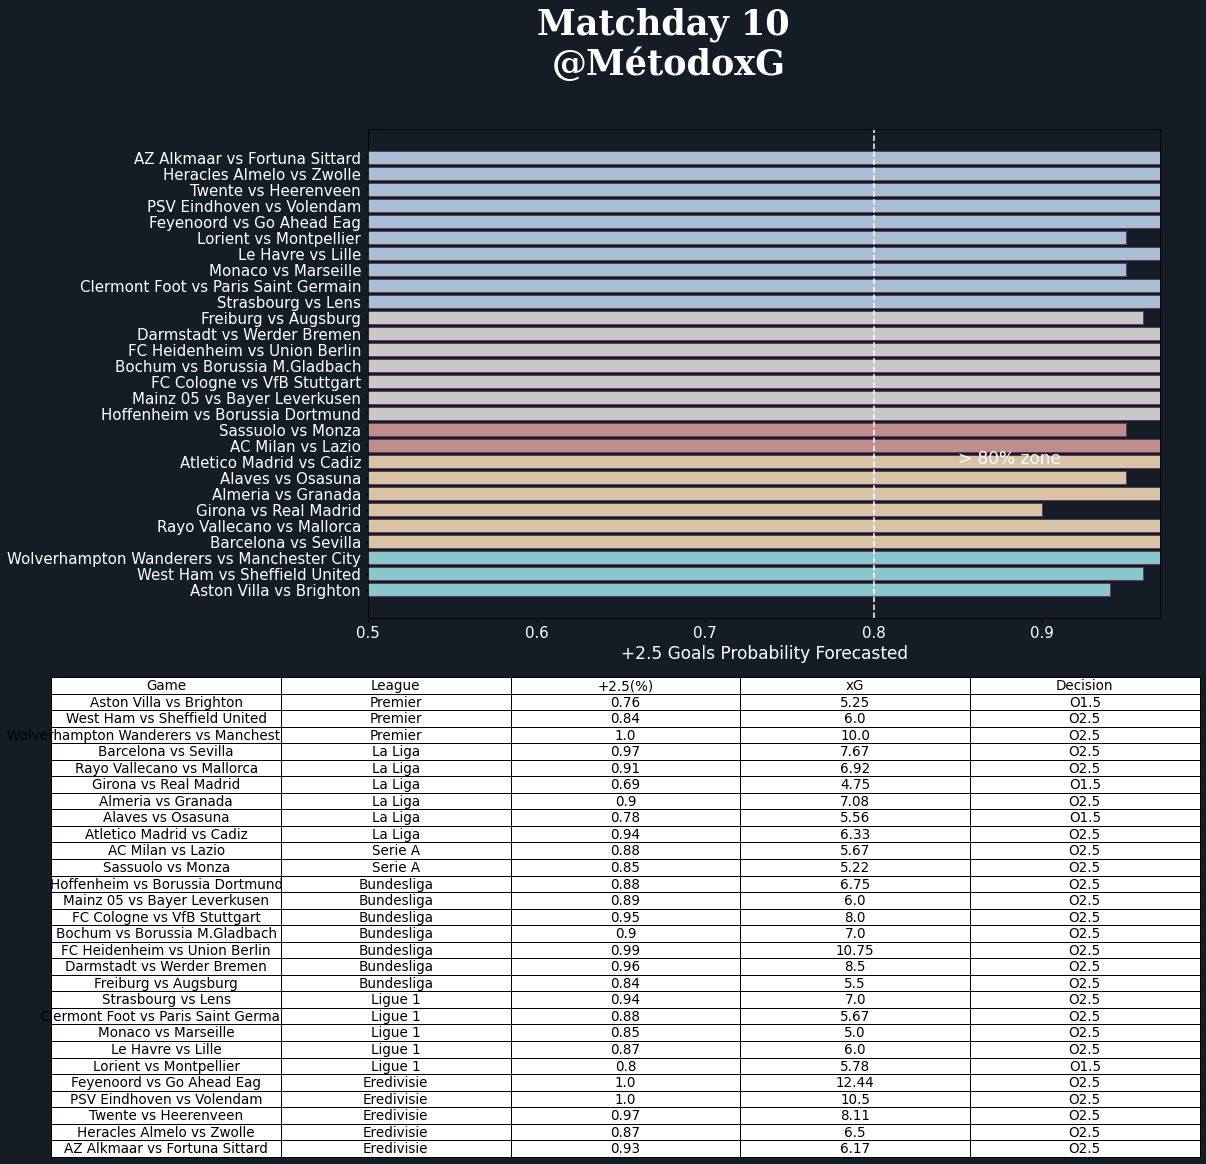

In [3]:
# getting an array of the values within df
np_arr = df.values

# separating the axis -> x-axis: game, y-axis: '%'
x = np_arr[:,0]
y = np_arr[:,2]

fig = plt.figure(figsize=(11,4))
ax = fig.add_axes([0,-0.8,1,1.7]) # left, bottom, width, height

ax.set_xlabel('+2.5 Goals Probability Forecasted', color='white', size=17)
#ax.set_ylabel('Game', color='white')
#ax.set_title('Matchday 1 Model Performance', color='white', size='20')
#ax.plot(x,y)




# BAR COLORS
# Defining a dictionary that maps each league to a color
color_dict = { 'Bundesliga': '#C8C8C8', 'Premier': '#88C8CB', 'La Liga': '#D8C4A4', 
              'Serie A': '#C08C8C', 'RFPL':'#C6C2E9', 'Ligue 1': '#A7BED3', 'Eredivisie':'#A7BED4'}
# create a list of colors based on the leageu column in dataframe
colors = [color_dict[league] for league in df['League']]

# Plot the chart
ax.barh(x,y, color=colors, edgecolor='#59405C')


# More Customized Title
title = 'Matchday 10 \n@MétodoxG'
plt.figtext(0.38, 1.09, title, ha='center', fontsize=35, color = "white", weight="bold", family = "serif")


# background colors
ax.set_facecolor('#141d26')
fig.set_facecolor("#141d26")

# set the color of the x-axis and y-axis tick labels
ax.tick_params(axis='x', which='major', labelcolor='white', labelsize='15')
ax.tick_params(axis='y', which='major', labelcolor='white', labelsize='15')




# create a separating line at 0.8
ax.axvline(x=0.8, color='white', linestyle='--')
# text
ax.text(0.85, 7.9, '> 80% zone', fontsize = 17, color='white')

# to zoom in the plot into a specific area:
ax.set_xlim([0.5,0.97])

'''
# image

ax_image_1 = fig.add_axes([0.02, 0.05, 1.7, 1.7]) 
img_1 = plt.imread('enzo_png_1.png')

ax_image_1.imshow(img_1)
ax_image_1.axis('off')
'''
plt.savefig('over_bar.png', format='png', dpi=50, bbox_inches='tight')

# TABLE 

tab = ax.table(cellText=df[['Game','League','+2.5(%)','xG', 'Decision']].values, 
               colLabels= ['Game','League','+2.5(%)','xG', 'Decision'], 
               cellLoc = 'center', loc='bottom', bbox=[-0.4,-1.1,1.45,0.98]) # left, bottom, width, height

tab.auto_set_font_size(False)
tab.set_fontsize(13.5)

# Game	League	+2.5 Goals (%)	Expected Goals	Decision
#plt.barh(x,y)

plt.show()

## H2H

In [4]:
# import dataframes of each Excel sheet
la_liga_h = pd.read_excel('PREDICTIONS_OUTPUT_XH2H.xlsx', sheet_name='La Liga')
epl_h = pd.read_excel('PREDICTIONS_OUTPUT_XH2H.xlsx', sheet_name='EPL')
serie_a_h = pd.read_excel('PREDICTIONS_OUTPUT_XH2H.xlsx', sheet_name='Serie A')
bundesliga_h = pd.read_excel('PREDICTIONS_OUTPUT_XH2H.xlsx', sheet_name='Bundesliga')
ligue_1_h = pd.read_excel('PREDICTIONS_OUTPUT_XH2H.xlsx', sheet_name='Ligue 1')
eredivisie_h = pd.read_excel('PREDICTIONS_OUTPUT_XH2H.xlsx', sheet_name='Eredivisie')

# Russia?
#rfpl_h = pd.read_excel('PREDICTIONS_OUTPUT_GOALS.xlsx', sheet_name='RFPL')

# add a column for the league of each df
la_liga_h['League'] = 'La Liga'
epl_h['League'] = 'Premier'
serie_a_h['League'] = 'Serie A'
bundesliga_h['League'] = 'Bundesliga'
ligue_1_h['League'] = 'Ligue 1'
eredivisie_h['League'] = 'Eredivisie'
#rfpl_h['League'] = 'RFPL'


# concatenate the datasets into one
df_h = pd.concat([epl_h, la_liga_h, serie_a_h, bundesliga_h, ligue_1_h, eredivisie_h]).reset_index(drop=True) # , rfpl 

# create a new column with the full game
df_h['home_team'] = df_h['home_team'] + ' vs ' + df_h['away_team']
df_h = df_h.drop('away_team', axis =1)


#rename columns
df_h = df_h.rename(columns= {'home_team':'Game'}) 


# change the order of the columns
df_h = df_h[['Game', 'League','Home (%)', 'Draw (%)', 'Away (%)']]


#rounding values        
df_h['Home (%)'] = round(df_h['Home (%)'],2)
df_h['Draw (%)'] = round(df_h['Draw (%)'],2)
df_h['Away (%)'] = round(df_h['Away (%)'],2)


df_full_h = df_h.copy() # COPY FOR FULL REPORT PDF


# FILTERING
# will keep values only over 65% (a parameter based on .describe() statistics [75%]
b = df_h.describe()

df_h = df_h[(df_h['Home (%)'] > b.iloc[6,0])  | (df_h['Away (%)'] > b.iloc[6,2])].reset_index(drop=True) # | (df_h2h['Draw (%)'] > b.iloc[6,1]) -> NOT USING DRAW FOR NOW

# Normalize values
df_h['Total'] = df_h.sum(axis=1)  # Get the sum of each row
df_h.iloc[:, 2:5] = df_h.iloc[:, 2:5].div(df_h['Total'], axis=0)  # Divide each value by the sum of the row
df_h.drop('Total', axis=1, inplace=True)  # Drop the temporary column

df_h


/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_76285/1761095456.py:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_h['Total'] = df_h.sum(axis=1)  # Get the sum of each row


,Game,League,Home (%),Draw (%),Away (%)
0,Bournemouth vs Arsenal,Premier,0.000000,0.370000,0.630000
1,Nottingham Forest vs Brentford,Premier,0.190000,0.260000,0.550000
2,Rayo Vallecano vs Mallorca,La Liga,0.144444,0.111111,0.744444
3,Real Sociedad vs Athletic Club,La Liga,0.000000,0.070707,0.929293
4,Alaves vs Osasuna,La Liga,0.244898,0.163265,0.591837
5,Atletico Madrid vs Cadiz,La Liga,0.986486,0.013514,0.000000
6,AC Milan vs Lazio,Serie A,0.954023,0.034483,0.011494
7,Salernitana vs Inter,Serie A,0.000000,0.080808,0.919192
8,Bologna vs Empoli,Serie A,0.949495,0.050505,0.000000
9,Udinese vs Genoa,Serie A,0.000000,0.570000,0.430000


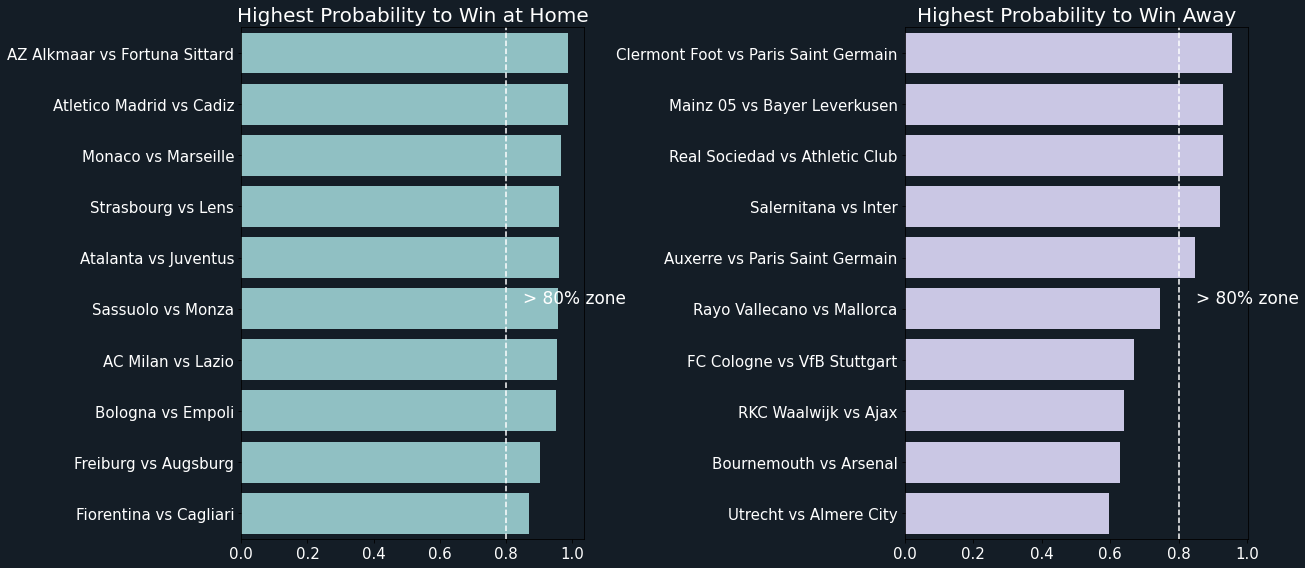

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a horizontal bar plot with the given data
def plot_horizontal_bar(ax, x, y, color, label):
    sns.barplot(x=x, y=y, ax=ax, color=color)
    ax.set_xlabel(label, color='white', size=17)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelcolor='white', labelsize='15')
    ax.set_facecolor('#141d26')
    ax.axvline(x=0.8, color='white', linestyle='--')
    ax.text(0.85, 4.9, '> 80% zone', fontsize=17, color='white')

# Sort the data by 'Home (%)' and 'Away (%)' in descending order to get the top 5 games
df_h_home_top5 = df_h.sort_values(by='Home (%)', ascending=False).head(10)
df_h_away_top5 = df_h.sort_values(by='Away (%)', ascending=False).head(10)

# Create the dashboard
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# background colors
ax.set_facecolor('#141d26')
fig.set_facecolor("#141d26")

# Top 5 games with the highest probability to win at Home
plot_horizontal_bar(axes[0], df_h_home_top5['Home (%)'], df_h_home_top5['Game'], '#88C8CB', '') #, '+2.5 Goals Probability Forecasted')
axes[0].set_title('Highest Probability to Win at Home', color='white', size=20)

# Top 5 games with the highest probability to win Away
plot_horizontal_bar(axes[1], df_h_away_top5['Away (%)'], df_h_away_top5['Game'], '#C6C2E9', '') #, '+2.5 Goals Probability Forecasted')
axes[1].set_title('Highest Probability to Win Away', color='white', size=20)


plt.tight_layout()
plt.savefig('h2h_bar.png', format='png', dpi=50, bbox_inches='tight')

plt.show()


## PDFs

### General Report (PDF)

In [9]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
import pandas as pd
import os


# Create a new PDF file

# Specify the directory path
output_dir = '/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/reports'

output_path = os.path.join(output_dir, f'Matchday General Report.pdf')
c = canvas.Canvas(output_path, pagesize=letter)


# Add TITLE to the PDF
text = f'General Report (O/U & H2H)'
c.setFont("Helvetica-Bold", 20)  # Set the font and font size
c.drawString(10, 770, text)  # Specify the X and Y coordinates and the text to be displayed

''' O/U TABLE '''
# df_full

#df_full.reset_index(inplace=True)

data = [df_full.columns.values.tolist()] + df_full.values.tolist()
df_table = Table(data)
df_table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                              ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                              ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                              ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                              ('FONTSIZE', (0, 0), (-1, 0), 7),
                              ('BOTTOMPADDING', (0, 0), (-1, 0), 5),
                              ('BACKGROUND', (0, 1), (-1, -1), colors.whitesmoke),
                              ('GRID', (0, 0), (-1, -1), 1, colors.black)]))

# Set the font size for data cells
data_style = TableStyle([
    ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
    ('FONTSIZE', (0, 1), (-1, -1), 5),  # Change the font size here
    ('LEADING', (0, 1), (-1, -1), 5)  # Change the leading (line spacing) if needed
])
df_table.setStyle(data_style)



# Set the table width and height
width, height = letter
df_table.wrapOn(c, width/2-50, height-150)
df_table.drawOn(c, 5, 40)


''' H2H TABLE '''
# df_full

#df_full.reset_index(inplace=True)

data_1 = [df_full_h.columns.values.tolist()] + df_full_h.values.tolist()
df_table_1 = Table(data_1)
df_table_1.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                              ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                              ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                              ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                              ('FONTSIZE', (0, 0), (-1, 0), 7),
                              ('BOTTOMPADDING', (0, 0), (-1, 0), 5),
                              ('BACKGROUND', (0, 1), (-1, -1), colors.whitesmoke),
                              ('GRID', (0, 0), (-1, -1), 1, colors.black)]))

# Set the font size for data cells
data_style = TableStyle([
    ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
    ('FONTSIZE', (0, 1), (-1, -1), 5),  # Change the font size here
    ('LEADING', (0, 1), (-1, -1), 5)  # Change the leading (line spacing) if needed
])
df_table_1.setStyle(data_style)



# Set the table width and height
width, height = letter
df_table_1.wrapOn(c, width/2-50, height-150)
df_table_1.drawOn(c, 315, 40)

 # Save and close the PDF file
c.save()

In [10]:
''' O/U GOALS DASHBOARD '''

# Specify the directory path
output_dir = '/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/reports'

output_path = os.path.join(output_dir, f'Goals Dashboard.pdf')
c = canvas.Canvas(output_path, pagesize=letter)


# Add TITLE to the PDF
text = f'O/U Dashboard'
c.setFont("Helvetica-Bold", 20)  # Set the font and font size
c.drawString(10, 770, text)  # Specify the X and Y coordinates and the text to be displayed

# GRAPH
c.drawImage('over_bar.png', 20, 380, width=550, height=350)


# TABLE

data_2 = [df.columns.values.tolist()] + df.values.tolist()
df_table_2 = Table(data_2)
df_table_2.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                              ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                              ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                              ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                              ('FONTSIZE', (0, 0), (-1, 0), 8),
                              ('BOTTOMPADDING', (0, 0), (-1, 0), 5),
                              ('BACKGROUND', (0, 1), (-1, -1), colors.whitesmoke),
                              ('GRID', (0, 0), (-1, -1), 1, colors.black)]))

# Set the font size for data cells
data_style = TableStyle([
    ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
    ('FONTSIZE', (0, 1), (-1, -1), 7),  # Change the font size here
    ('LEADING', (0, 1), (-1, -1), 7)  # Change the leading (line spacing) if needed
])
df_table_2.setStyle(data_style)



# Set the table width and height
width, height = letter
df_table_2.wrapOn(c, 100, 100)
df_table_2.drawOn(c, 20, 130)

# Save and close the PDF file
c.save()


In [11]:
''' H2H GOALS DASHBOARD '''

# Specify the directory path
output_dir = '/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/reports'

output_path = os.path.join(output_dir, f'H2H Dashboard.pdf')
c = canvas.Canvas(output_path, pagesize=letter)


# Add TITLE to the PDF
text = f'H2H Dashboard'
c.setFont("Helvetica-Bold", 20)  # Set the font and font size
c.drawString(10, 770, text)  # Specify the X and Y coordinates and the text to be displayed

# GRAPH
c.drawImage('h2h_bar.png', 20, 430, width=570, height=320)


# TABLE

data_3 = [df_h.columns.values.tolist()] + df_h.values.tolist()
df_table_3 = Table(data_3)
df_table_3.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                              ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                              ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                              ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                              ('FONTSIZE', (0, 0), (-1, 0), 8),
                              ('BOTTOMPADDING', (0, 0), (-1, 0), 5),
                              ('BACKGROUND', (0, 1), (-1, -1), colors.whitesmoke),
                              ('GRID', (0, 0), (-1, -1), 1, colors.black)]))

# Set the font size for data cells
data_style = TableStyle([
    ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
    ('FONTSIZE', (0, 1), (-1, -1), 7),  # Change the font size here
    ('LEADING', (0, 1), (-1, -1), 7)  # Change the leading (line spacing) if needed
])
df_table_3.setStyle(data_style)



# Set the table width and height
width, height = letter
df_table_3.wrapOn(c, 100, 100)
df_table_3.drawOn(c, 20, 10)

# Save and close the PDF file
c.save()

***
# Odds Inputting

<div class="alert alert-block alert-success">
<b>To Excel file:</b> Manipulation of the data to be later exported into an excel file that will be manually edited and data inputted to reflect the different odds that bookmaker establishes for each specific game.
</div>

In [12]:
''' O/U 2.5 '''

# filter to only show >70% games
odds_inputo = df[df['+2.5(%)'] >= 0.70].reset_index(drop=True)
#add two columns
odds_inputo['O1.5'] = ' '
odds_inputo['O2.5'] = ' '
#sent file to excel
odds_inputo.to_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/Odds Inputting/odds_input_external.xlsx', index=False)
                     
odds_inputo.head(3)                 

,Game,League,+1.5(%),+2.5(%),+3.5(%),xG,Decision,O1.5,O2.5
0,Aston Villa vs Brighton,Premier,0.94,0.76,0.52,5.25,O1.5,,
1,West Ham vs Sheffield United,Premier,0.96,0.84,0.63,6.00,O2.5,,
2,Wolverhampton Wanderers vs Manchester City,Premier,1.00,1.00,0.98,10.00,O2.5,,


In [13]:
'''
H2H
'''
# creating decision and probability columns
for index, row in df_h.iterrows():
    max_value = row[['Home (%)', 'Draw (%)', 'Away (%)']].max()  # getting the maximum value
    if max_value == row['Home (%)']:
        df_h.at[index, 'Decision'] = 'Home'
        df_h.at[index, 'Probability'] = row['Home (%)']
    elif max_value == row['Draw (%)']:
        df_h.at[index, 'Decision'] = 'Draw'
        df_h.at[index, 'Probability'] = row['Draw (%)']
    else:
        df_h.at[index, 'Decision'] = 'Away'
        df_h.at[index, 'Probability'] = row['Away (%)']

# filter to only show > 70% values
odds_inputh = df_h[df_h['Probability'] >= 0.70].reset_index(drop=True) 
odds_inputh['Odds'] = ' '

#sent file to excel
odds_inputh.to_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/Odds Inputting/odds_h2h_input_external.xlsx', index=False)

odds_inputh.head(3)

,Game,League,Home (%),Draw (%),Away (%),Decision,Probability,Odds
0,Rayo Vallecano vs Mallorca,La Liga,0.144444,0.111111,0.744444,Away,0.744444,
1,Real Sociedad vs Athletic Club,La Liga,0.000000,0.070707,0.929293,Away,0.929293,
2,Atletico Madrid vs Cadiz,La Liga,0.986486,0.013514,0.000000,Home,0.986486,


***
# Optimization Section

<div class="alert alert-block alert-success">
<b>Expected Value Method:</b> The Expected Value (EV) method is a mathematical approach used in betting to assess the potential profitability of a particular bet. It helps in making informed betting decisions based on probability and odds. If the EV is positive, it suggests a potentially profitable bet.
If the EV is negative, it indicates an unprofitable bet. <p>
<b>Kelly Formula:</b> The Kelly Criterion is a formula developed by John L. Kelly Jr. It provides a betting strategy that aims to maximize long-term growth while minimizing the risk of ruin. 
</div>

In [14]:
# importing datasets

opt_df_goals = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/Odds Inputting/odds_input_external.xlsx')
opt_df_h2h = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/Odds Inputting/odds_h2h_input_external.xlsx')
                                                                           

In [15]:
opt_df_goals.head(5)

,Game,League,+1.5(%),+2.5(%),+3.5(%),xG,Decision,O1.5,O2.5
0,Aston Villa vs Brighton,Premier,0.94,0.76,0.52,5.25,O1.5,1.174,1.444
1,West Ham vs Sheffield United,Premier,0.96,0.84,0.63,6.00,O2.5,1.208,1.667
2,Wolverhampton Wanderers vs Manchester City,Premier,1.00,1.00,0.98,10.00,O2.5,1.190,1.532
3,Barcelona vs Sevilla,La Liga,0.99,0.97,0.90,7.67,O2.5,1.208,1.500
4,Rayo Vallecano vs Mallorca,La Liga,0.98,0.91,0.75,6.92,O2.5,1.465,2.730


## Expected Value Method

In [16]:
''' OVER/UNDER GOALS '''

opt_df_goals['EV(O1.5)'] = (opt_df_goals['+1.5(%)'] * opt_df_goals['O1.5']) - 1
opt_df_goals['EV(O2.5)'] = (opt_df_goals['+2.5(%)'] * opt_df_goals['O2.5']) - 1

# selecting the three games with the highest EV for a combination of two O1.5 bets and O2.5 bet
df_sorted_over_1_5 = opt_df_goals.sort_values(by='EV(O1.5)', ascending=False).head(2)
df_sorted_over_2_5 = opt_df_goals.sort_values(by='EV(O2.5)', ascending=False).head(1)

df_sorted_over_1_5
df_sorted_over_2_5

,Game,League,+1.5(%),+2.5(%),+3.5(%),xG,Decision,O1.5,O2.5,EV(O1.5),EV(O2.5)
4,Rayo Vallecano vs Mallorca,La Liga,0.98,0.91,0.75,6.92,O2.5,1.465,2.73,0.4357,1.4843


In [17]:
# getting likelihood (%)
like_1_5 = df_sorted_over_1_5.loc[df_sorted_over_1_5.index[1], '+1.5(%)'] * df_sorted_over_1_5.loc[df_sorted_over_1_5.index[0], '+1.5(%)']
like_2_5 = df_sorted_over_2_5.loc[df_sorted_over_2_5.index[0], '+2.5(%)']
total_like = like_1_5 * like_2_5

# getting odds
odds_1_5 = df_sorted_over_1_5.loc[df_sorted_over_1_5.index[1], 'O1.5'] * df_sorted_over_1_5.loc[df_sorted_over_1_5.index[0], 'O1.5']
odds_2_5 = df_sorted_over_2_5.loc[df_sorted_over_2_5.index[0], 'O2.5']
total_odds = odds_1_5 * odds_2_5

# getting games
game_1 = df_sorted_over_1_5.loc[df_sorted_over_1_5.index[0], 'Game']
game_2 = df_sorted_over_1_5.loc[df_sorted_over_1_5.index[1], 'Game']
game_3 = df_sorted_over_2_5.loc[df_sorted_over_2_5.index[0], 'Game']

#odds 
odds_1 = df_sorted_over_1_5.loc[df_sorted_over_1_5.index[0], 'O1.5']
odds_2 = df_sorted_over_1_5.loc[df_sorted_over_1_5.index[1], 'O1.5']


''' PRINTING '''
print(' Bets Placed: \n')
print(f' Bet 1 (+1.5) -> {game_1}: {odds_1} \n Bet 2 (+1.5) -> {game_2}: {odds_2} \n Bet 3 (+2.5) -> {game_3}: {odds_2_5} \n')

print(f' Total Likelihood: {(total_like*100):.2f}% \n Total Odds: {round(total_odds,2)}')

 Bets Placed: 

 Bet 1 (+1.5) -> Rayo Vallecano vs Mallorca: 1.465 
 Bet 2 (+1.5) -> Alaves vs Osasuna: 1.5 
 Bet 3 (+2.5) -> Rayo Vallecano vs Mallorca: 2.73 

 Total Likelihood: 84.72% 
 Total Odds: 6.0


## Kelly Formula

In [18]:
# define last variable for Kelly (probability of losing)
# implied_probability = 1 / total_odds ---> Interesting concept(?)
prob_losing = 1 - total_like

# Kelly formula
kelly_fraction =  ((total_odds * total_like - prob_losing) / total_odds) / 3
kelly_fraction

''' STILL NEED TO IMPLEMENT HALF KELLY (OR 1/3 KELLY), THAT IS ONLY HALVING OR DIVIDING THE KELLY FRANCTION, BUT NEED TO DO MORE RESEARCH ON THAT '''
budget = float(input('Enter your budget: '))

place = kelly_fraction * budget

# potential profit
revenue = place * total_odds
profit = revenue - place

print(f'\nBased on the Expected Value and Kelly Formula, the program suggests allocating: {kelly_fraction*100:.2f}% of total Portfolio: ${budget:.2f} \nwhich accounts for: ${place:.2f}.\n')
print(f'Potential revenue: ${revenue:.2f} \nPotential Profit: \033[32m${profit:.2f}\033[0m ')      

Enter your budget:  300



Based on the Expected Value and Kelly Formula, the program suggests allocating: 27.39% of total Portfolio: $300.00 
which accounts for: $82.17.

Potential revenue: $492.98 
Potential Profit: $410.80 
